# kNN 基础

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_x = [[3.39, 2.33],
              [3.11, 1.78],
              [1.34, 3.36],
              [3.58, 4.67],
              [2.28, 2.86],
              [7.42, 4.69],
              [5.74, 3.53],
              [9.17, 2.51],
              [7.79, 3.42],
              [7.93, 0.79]
             ]
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

In [3]:
x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

In [4]:
x_train

array([[3.39, 2.33],
       [3.11, 1.78],
       [1.34, 3.36],
       [3.58, 4.67],
       [2.28, 2.86],
       [7.42, 4.69],
       [5.74, 3.53],
       [9.17, 2.51],
       [7.79, 3.42],
       [7.93, 0.79]])

In [5]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

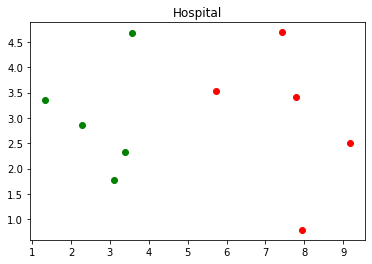

In [30]:
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0,1],color='g')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1,1], color='r') 
plt.title("Hospital")
plt.show()

In [7]:
x = np.array([8.09, 3.36]) #需要预测 x 是属于红色类，还是绿色类

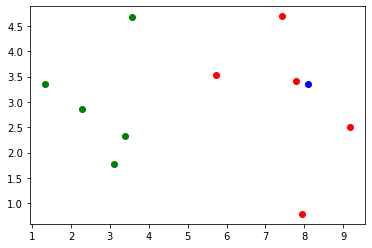

In [8]:
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0,1],color='g')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1,1], color='r')
plt.scatter(x[0],x[1],color='b') #在图上单独绘制查看
plt.show()

# kNN 的过程

In [9]:
from math import sqrt
distance = [] 
for sub_x_train in  x_train:
    d = sqrt(np.sum(sub_x_train - x) ** 2)
    distance.append(d)

In [10]:
distance

[5.729999999999999,
 6.5600000000000005,
 6.75,
 3.1999999999999997,
 6.3100000000000005,
 0.6600000000000006,
 2.1799999999999997,
 0.22999999999999998,
 0.23999999999999977,
 2.73]

In [12]:
np.argsort(distance) #对于离 x 最近的几个点进行排序 ，argsort 返回的是索引

array([7, 8, 5, 6, 9, 3, 0, 4, 1, 2])

In [13]:
nearest = np.argsort(distance)

In [14]:
k = 6

In [15]:
topK_y = [y_train[i] for i in nearest[:k]]

In [16]:
topK_y

[1, 1, 1, 1, 1, 0]

In [17]:
from collections import Counter
Counter(topK_y) 

Counter({1: 5, 0: 1})

In [18]:
votes = Counter(topK_y)

In [19]:
votes.most_common(1) #票数最多的1个元素

[(1, 5)]

In [20]:
votes.most_common(1)[0][0] #第一项 这个元素是谁，第二项 数量

1

In [21]:
predict_y = votes.most_common(1)[0][0]

In [22]:
predict_y #完成 kNN 算法

1